In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'tsaichengyen'
os.environ['KAGGLE_KEY'] = '975e30db01c493bc69777dfed026a9a2'
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# 解壓縮數據集
import zipfile
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('titanic')

In [4]:
# 加載數據
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

# 數據清理
def clean_data(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
    return df

train = clean_data(train)
test = clean_data(test)

C:\Users\user\AppData\Local\Temp\ipykernel_14300\2412895938.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14300\2412895938.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
# 準備訓練數據
X = train.drop(columns=['Survived', 'PassengerId'])
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 訓練模型
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [7]:
# 預測
y_pred = model.predict(X_test)

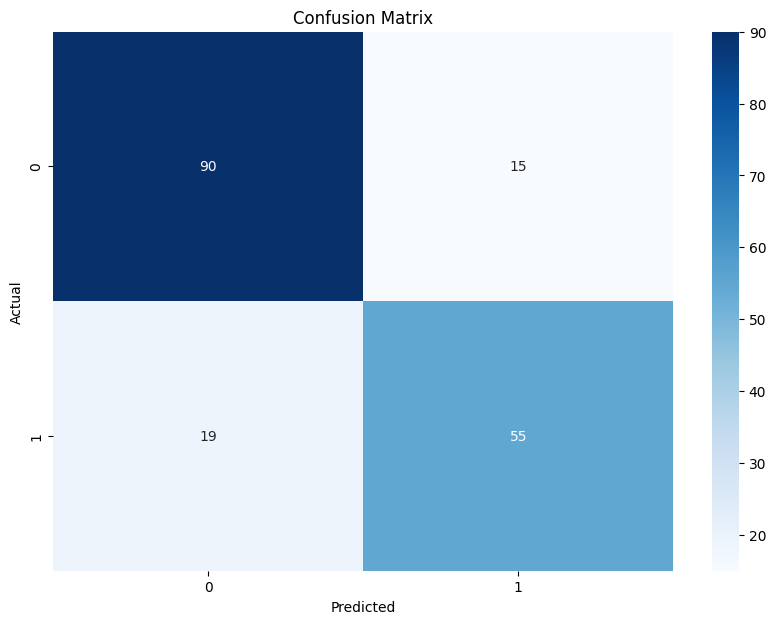

Accuracy: 81.01%


In [8]:
# 評估模型
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# 顯示混淆矩陣
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy * 100:.2f}%')

In [9]:
# 將結果導出為CSV文件
test['Survived'] = model.predict(test.drop(columns=['PassengerId']))
output = test[['PassengerId', 'Survived']]
output.to_csv('output.csv', index=False)